# Raport z zadania regresja i klasyfikacja
### Aleksander Szymczyk (aleksander.szymczyk.stud@pw.edu.pl)

In [1]:
from preprocessing import set_discrete_columns, remove_outliers, split_dataset
from treeID3 import Tree
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/cardio_train.csv", sep=";", index_col=0)
df = remove_outliers(df, ["ap_hi", "ap_lo", "weight", "height"], 3)
df = remove_outliers(df, ["ap_hi", "ap_lo"], 5)
df, groups = set_discrete_columns(df, ["age", "height", "weight", "ap_hi", "ap_lo"])
pd.set_option("display.precision", 3)
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.0
mean,5.573,1.350,5.079,4.899,0.001,0.016,1.367,1.226,0.088,0.054,0.804,0.5
std,1.706,0.477,0.463,1.230,0.109,0.193,0.680,0.572,0.283,0.226,0.397,0.5
min,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.0
25%,4.000,1.000,5.000,4.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.0
50%,6.000,1.000,5.000,5.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.0
75%,7.000,2.000,5.000,6.000,0.000,0.000,2.000,1.000,0.000,0.000,1.000,1.0
max,8.000,2.000,9.000,15.000,11.000,11.000,3.000,3.000,1.000,1.000,1.000,1.0


In [3]:
groups

{'age': {0: '(10785.085, 12233.0]',
  1: '(13668.0, 15103.0]',
  2: '(15103.0, 16538.0]',
  3: '(16538.0, 17973.0]',
  4: '(17973.0, 19408.0]',
  5: '(19408.0, 20843.0]',
  6: '(20843.0, 22278.0]',
  7: '(22278.0, 23713.0]'},
 'height': {0: '(54.805, 74.5]',
  1: '(74.5, 94.0]',
  2: '(94.0, 113.5]',
  3: '(113.5, 133.0]',
  4: '(133.0, 152.5]',
  5: '(152.5, 172.0]',
  6: '(172.0, 191.5]',
  7: '(191.5, 211.0]',
  8: '(230.5, 250.0]'},
 'weight': {0: '(9.81, 21.875]',
  1: '(21.875, 33.75]',
  2: '(33.75, 45.625]',
  3: '(45.625, 57.5]',
  4: '(57.5, 69.375]',
  5: '(69.375, 81.25]',
  6: '(81.25, 93.125]',
  7: '(93.125, 105.0]',
  8: '(105.0, 116.875]',
  9: '(116.875, 128.75]',
  10: '(128.75, 140.625]',
  11: '(140.625, 152.5]',
  12: '(152.5, 164.375]',
  13: '(164.375, 176.25]',
  14: '(176.25, 188.125]',
  15: '(188.125, 200.0]'},
 'ap_hi': {0: '(-166.17, 1197.5]',
  1: '(1197.5, 2545.0]',
  2: '(10630.0, 11977.5]',
  3: '(11977.5, 13325.0]',
  4: '(13325.0, 14672.5]',
  5: '(1

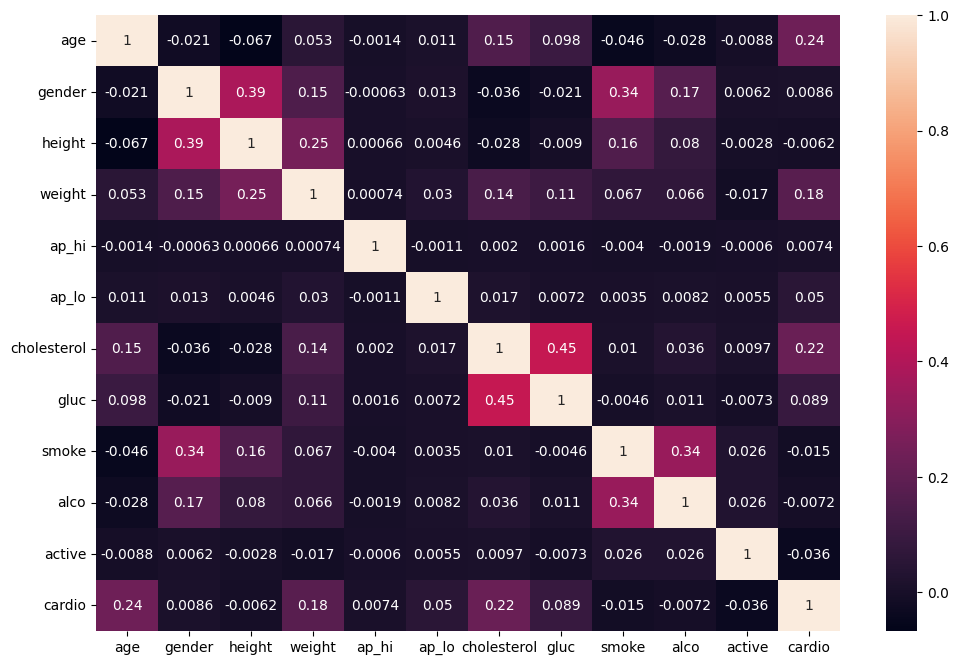

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

In [5]:
X_train, y_train, X_dev, y_dev, X_test, y_test = split_dataset(df, "cardio")

In [6]:
cardio_disease_model = Tree(4, "cardio")
cardio_disease_model.fit(X_train, y_train)

In [7]:
y_train_pred = cardio_disease_model.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.6496598639455783

In [8]:
y_dev_pred = cardio_disease_model.predict(X_dev)
accuracy_score(y_dev, y_dev_pred)

0.6393458393458393

In [9]:
# df = pd.read_csv("dataset/test.csv", sep=";", index_col=0)
# new_tree = Tree( 6, "play_tenis")
# Y = df['play_tenis']
# X = df.drop(columns='play_tenis', axis=1)

# new_tree.fit(X, Y)

In [10]:
# df = pd.read_csv("dataset/xd.csv", sep=";", index_col=0)
# predictions = new_tree.predict(df)

In [11]:
# print(predictions)